<h2>Table_of_Contents</h2>

- [R data structure with I/O](#R_data_structure_with_I/O)
    - [Data structure](#Data_structure)
        - [Scalar](#Scalar)
        - [Vector](#Vector)
        - [Matrix](#Matrix)
        - [Array](#Array)
        - [Data frame](#Data_frame)
        - [List](#List)
    - [Load the data](#Load_the_data)
        - [Load the txt file](#Load_the_txt_file)
        - [Load the csv file](#Load_the_csv_file)
        - [Load the excel file](#Load_the_excel_file)
        - [View the data structure](#View_the_data_structure)
    - [Factor and label](#Factor_and_label)
    - [Export the data](#Export_the_data)
        - [Export the txt file](#Export_the_txt_file)
        - [Export the csv file](#Export_the_csv_file)
        - [Export the excel file](#Export_the_excel_file)
        - [Export the data as R](#Export_the_data_as_R)
- [References](#References)

<h3>R_data_structure_with_I/O</h3>

<h4>Data_structure</h4>

<center><img src="img/r_Data_structure.png" ></center> 

<li>Save only with the same data type: scalar, vector, matrix, array</li>
<li>Different types of data types can be stored: data frames, lists</li>

<h5>Scalar</h5>

In [4]:
# Scalar
c(1)

[1] 1

[Back to the top](#Table_of_Contents)

<h5>Vector</h5>

In [9]:
# Vector (c) - Numeric data type
num <- c(1,2,3,4) # c(1:4)
num
# View(num) # only working in RStudio

[1] 1 2 3 4

In [10]:
num.T <- t(num) # Transpose column vector to row vector
num.T
# View(numT) # only working in RStudio

1,2,3,4


In [12]:
num %*% num.T # Vector multiplication (4*1 X 1*4) = 4*4

1,2,3,4
2,4,6,8
3,6,9,12
4,8,12,16


In [13]:
num.T %*% num # Vector multiplication (1*4 X 4*1) = 1*1

30


In [14]:
# character, logical data type
c("M","F","F","M")
c(TRUE, FALSE, FALSE, TRUE)

[1] "M" "F" "F" "M"

[1]  TRUE FALSE FALSE  TRUE

[Back to the top](#Table_of_Contents)

<h5>Matrix</h5>

In [18]:
m <- 1:12
print(m)

# Matrix (Matrix 4x3)
mtx <- matrix(m, nrow=4)
print(mtx)

 [1]  1  2  3  4  5  6  7  8  9 10 11 12
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12


In [19]:
mtx[3,2]

[1] 7

[Back to the top](#Table_of_Contents)

<h5>Array</h5>

In [17]:
# Array (Array 2x3x2)
arr <- array(m, c(2,3,2))
print(arr)

, , 1

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

, , 2

     [,1] [,2] [,3]
[1,]    7    9   11
[2,]    8   10   12



[Back to the top](#Table_of_Contents)

<h5>Data_frame</h5>

In [20]:
# Data Frame
var1 <- c(1,2,3,4)
var2 <- factor(c("M","F","F","M"))
df = data.frame(id = var1, sex = var2)
str(df)

'data.frame':	4 obs. of  2 variables:
 $ id : num  1 2 3 4
 $ sex: Factor w/ 2 levels "F","M": 2 1 1 2


[Back to the top](#Table_of_Contents)

<h5>List</h5>

In [21]:
# list
v1 <- c(1,2,3,4)
v2 <- matrix(1:12, nrow=4)
v3 <- array(1:12, c(2,3,2))
v4 <- data.frame(id = c(1,2,3,4), sex = c("M","F","F","M"))
lt <- list (v1, v2, v3, v4)
str(lt)

List of 4
 $ : num [1:4] 1 2 3 4
 $ : int [1:4, 1:3] 1 2 3 4 5 6 7 8 9 10 ...
 $ : int [1:2, 1:3, 1:2] 1 2 3 4 5 6 7 8 9 10 ...
 $ :'data.frame':	4 obs. of  2 variables:
  ..$ id : num [1:4] 1 2 3 4
  ..$ sex: Factor w/ 2 levels "F","M": 2 1 1 2


In [23]:
print(lt)

[[1]]
[1] 1 2 3 4

[[2]]
     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

[[3]]
, , 1

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6

, , 2

     [,1] [,2] [,3]
[1,]    7    9   11
[2,]    8   10   12


[[4]]
  id sex
1  1   M
2  2   F
3  3   F
4  4   M



[Back to the top](#Table_of_Contents)

<h3>Load_the_data</h3>

<li>Read.table: load the txt file # 0201.grade, separated by tab</li>
<li>Read.csv: load the csv file # 0201.grade.csv, separated by ","</li>
<li>Read_excel: load the excel file # 0201.grade.xlsx, prerequisite adding library</li>
<li>In addition, files such as SPSS and JSON can be connected</li>

In [1]:
r_data_input_output_dataset = "
    example/0201.grade.txt,
    example/0202.grade.csv,
    example/0203.grade.xlsx
"

<h4>Load_the_txt_file</h4>

In [3]:
# Load the data (read.table)
# header = FALSE, (When there is no variable name)"
# sep (separtor): "," or " " or ":" or "\t" (tab)
# stringAsFactor = recognize text data as a factor (True)
# na.strings = "", ".", "NA" etc.
# str() : view attributes

gradetxt <- read.table("example/0201.grade.txt",
                       header=FALSE,
                       sep = "\t",
                       stringsAsFactor = FALSE,
                       na.strings = ""
                      )
str(gradetxt)

'data.frame':	50 obs. of  4 variables:
 $ V1: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2: chr  "Male" "Male" "Male" "Male" ...
 $ V3: int  1 1 1 1 1 1 1 1 1 1 ...
 $ V4: int  3 4 5 3 2 5 4 4 3 2 ...


In [4]:
print(gradetxt)

   V1     V2 V3 V4
1   1   Male  1  3
2   2   Male  1  4
3   3   Male  1  5
4   4   Male  1  3
5   5   Male  1  2
6   6   Male  1  5
7   7   Male  1  4
8   8   Male  1  4
9   9   Male  1  3
10 10   Male  1  2
11 11   Male  1  5
12 12   Male  1  4
13 13   Male  1  4
14 14   Male  1  3
15 15   Male  1  5
16 16   Male  1  4
17 17   Male  1  4
18 18   Male  1  1
19 19   Male  1  2
20 20   Male  1  2
21 21   Male  1  4
22 22   Male  1  3
23 23   Male  1  4
24 24   Male  1  3
25 25   Male  1  4
26 26 Female  2  4
27 27 Female  2  3
28 28 Female  2  4
29 29 Female  2  1
30 30 Female  2  4
31 31 Female  2  4
32 32 Female  2  2
33 33 Female  2  3
34 34 Female  2  5
35 35 Female  2  4
36 36 Female  2  3
37 37 Female  2  4
38 38 Female  2  4
39 39 Female  2  3
40 40 Female  2  4
41 41 Female  2  3
42 42 Female  2  3
43 43 Female  2  2
44 44 Female  2  4
45 45 Female  2  3
46 46 Female  2  4
47 47 Female  2  5
48 48 Female  2  4
49 49 Female  2  3
50 50 Female  2  3


[Back to the top](#Table_of_Contents)

<h4>Load_the_csv_file</h4>

In [33]:
# Load the data (read.csv)
# No separator due to separted by ","
# stringsAsFactor = It doesn't matter if you don't specify

gradecsv <- read.csv("example/0202.grade.csv",
                     header = TRUE, # T
                     na.strings = "."
                    )
str(gradecsv)

'data.frame':	50 obs. of  4 variables:
 $ id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ msex : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ csex : int  1 1 1 1 1 1 1 1 1 1 ...
 $ grade: int  3 4 5 3 2 5 4 4 3 2 ...


In [5]:
print(gradecsv)

   id   msex csex grade
1   1   Male    1     3
2   2   Male    1     4
3   3   Male    1     5
4   4   Male    1     3
5   5   Male    1     2
6   6   Male    1     5
7   7   Male    1     4
8   8   Male    1     4
9   9   Male    1     3
10 10   Male    1     2
11 11   Male    1     5
12 12   Male    1     4
13 13   Male    1     4
14 14   Male    1     3
15 15   Male    1     5
16 16   Male    1     4
17 17   Male    1     4
18 18   Male    1     1
19 19   Male    1     2
20 20   Male    1     2
21 21   Male    1     4
22 22   Male    1     3
23 23   Male    1     4
24 24   Male    1     3
25 25   Male    1     4
26 26 Female    2     4
27 27 Female    2     3
28 28 Female    2     4
29 29 Female    2     1
30 30 Female    2     4
31 31 Female    2     4
32 32 Female    2     2
33 33 Female    2     3
34 34 Female    2     5
35 35 Female    2     4
36 36 Female    2     3
37 37 Female    2     4
38 38 Female    2     4
39 39 Female    2     3
40 40 Female    2     4
41 41 Female    

[Back to the top](#Table_of_Contents)

<h4>Load_the_excel_file</h4>

In [36]:
# Load the data (read_excel)
install.packages('readxl') # install the packages
library(readxl) # import the library
gradexls <- read_excel("example/0203.grade.xlsx",
                       sheet = "grade",
                       col_names = TRUE,
                       na = "NA"
                      )
str(gradexls)

package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kimji\AppData\Local\Temp\RtmpeUstLR\downloaded_packages


Warning message:
"package 'readxl' was built under R version 3.6.3"

Classes 'tbl_df', 'tbl' and 'data.frame':	50 obs. of  4 variables:
 $ id   : num  1 2 3 4 5 6 7 8 9 10 ...
 $ msex : chr  "Male" "Male" "Male" "Male" ...
 $ csex : num  1 1 1 1 1 1 1 1 1 1 ...
 $ grade: num  3 4 5 3 2 5 4 4 3 2 ...


In [7]:
gradexls

id,msex,csex,grade
1,Male,1,3
2,Male,1,4
3,Male,1,5
4,Male,1,3
5,Male,1,2
6,Male,1,5
7,Male,1,4
8,Male,1,4
9,Male,1,3
10,Male,1,2


[Back to the top](#Table_of_Contents)

<h4>View_the_data_structure</h4>

In [8]:
# View the data structure
str(gradexls) # summary of the data structure
dim(gradexls) # data row number and whole data number
summary(gradexls) # summary of data
summary(gradexls$msex) # specific variable summary

Classes 'tbl_df', 'tbl' and 'data.frame':	50 obs. of  4 variables:
 $ id   : num  1 2 3 4 5 6 7 8 9 10 ...
 $ msex : chr  "Male" "Male" "Male" "Male" ...
 $ csex : num  1 1 1 1 1 1 1 1 1 1 ...
 $ grade: num  3 4 5 3 2 5 4 4 3 2 ...


[1] 50  4

       id            msex                csex         grade     
 Min.   : 1.00   Length:50          Min.   :1.0   Min.   :1.00  
 1st Qu.:13.25   Class :character   1st Qu.:1.0   1st Qu.:3.00  
 Median :25.50   Mode  :character   Median :1.5   Median :4.00  
 Mean   :25.50                      Mean   :1.5   Mean   :3.46  
 3rd Qu.:37.75                      3rd Qu.:2.0   3rd Qu.:4.00  
 Max.   :50.00                      Max.   :2.0   Max.   :5.00  

   Length     Class      Mode 
       50 character character 

[Back to the top](#Table_of_Contents)

<h3>Factor_and_label</h3>

<center><img src="img/r_All_kinds_of_objects.png" ></center> 

   V1     V2 V3 V4
1   1   Male  1  3
2   2   Male  1  4
3   3   Male  1  5
4   4   Male  1  3
5   5   Male  1  2
6   6   Male  1  5
7   7   Male  1  4
8   8   Male  1  4
9   9   Male  1  3
10 10   Male  1  2
11 11   Male  1  5
12 12   Male  1  4
13 13   Male  1  4
14 14   Male  1  3
15 15   Male  1  5
16 16   Male  1  4
17 17   Male  1  4
18 18   Male  1  1
19 19   Male  1  2
20 20   Male  1  2
21 21   Male  1  4
22 22   Male  1  3
23 23   Male  1  4
24 24   Male  1  3
25 25   Male  1  4
26 26 Female  2  4
27 27 Female  2  3
28 28 Female  2  4
29 29 Female  2  1
30 30 Female  2  4
31 31 Female  2  4
32 32 Female  2  2
33 33 Female  2  3
34 34 Female  2  5
35 35 Female  2  4
36 36 Female  2  3
37 37 Female  2  4
38 38 Female  2  4
39 39 Female  2  3
40 40 Female  2  4
41 41 Female  2  3
42 42 Female  2  3
43 43 Female  2  2
44 44 Female  2  4
45 45 Female  2  3
46 46 Female  2  4
47 47 Female  2  5
48 48 Female  2  4
49 49 Female  2  3
50 50 Female  2  3


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"NAs introduced by coercion"Warning message in min(x):
"no non-missing arguments to min; returning Inf"Warning message in max(x):
"no non-missing arguments to max; returning -Inf"

ERROR: Error in plot.window(...): need finite 'xlim' values


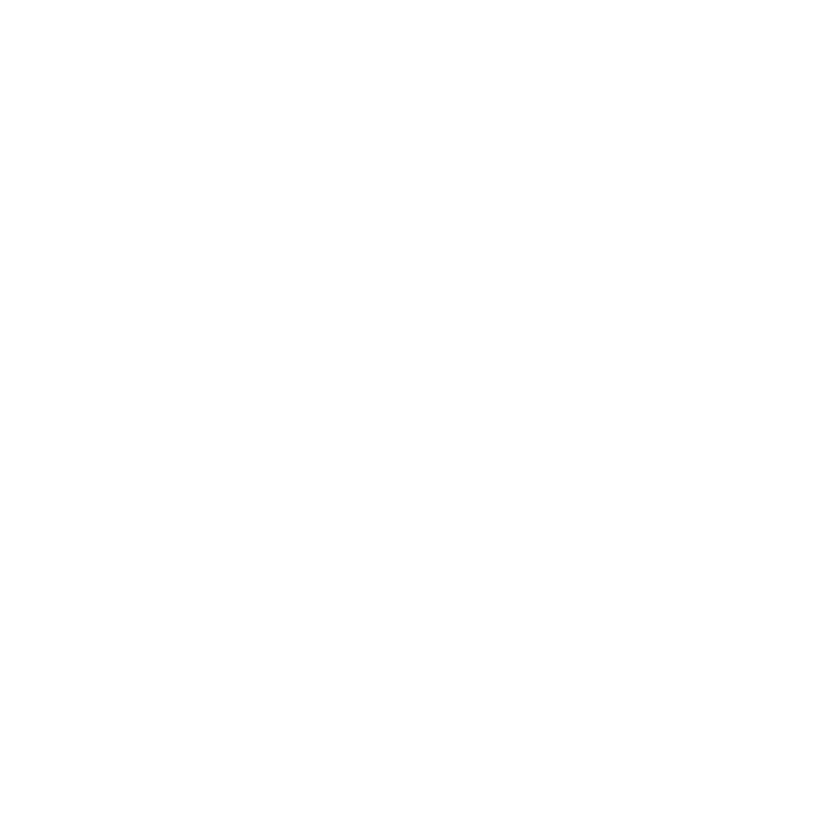

In [24]:
# factor (handle the qualitative (categorical) variable)
gradetxt <- read.table("example/0201.grade.txt",
                       header=FALSE,
                       sep = "\t",
                       stringsAsFactor = FALSE,
                       na.strings = ""
                      )

# without handling factor
print(gradetxt)
plot(x = gradetxt$V2, y = gradetxt$V4) # Error in plot

 Factor w/ 2 levels "Male","Female": 1 1 1 1 1 1 1 1 1 1 ...



  Male Female 
    25     25 

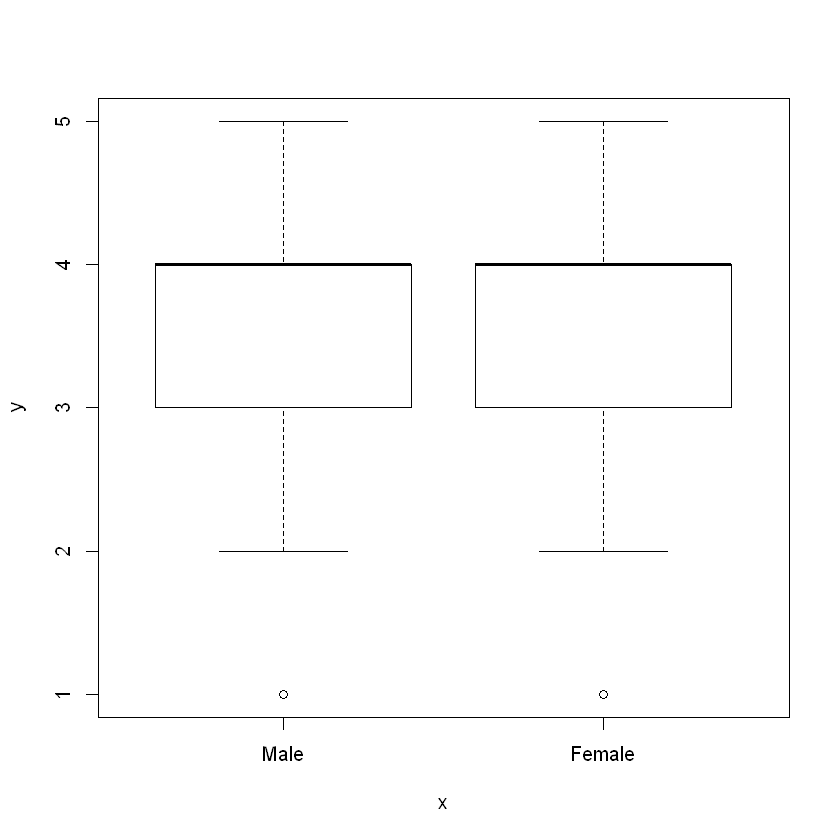

In [25]:
# Character type data factor
# with handling factor
gradetxt$V2 <- factor(gradetxt$V2,
                      levels = c("Male", "Female")
                     )
str(gradetxt$V2)
table(gradetxt$V2)
plot(x = gradetxt$V2, y = gradetxt$V4)

In [26]:
# Numeric variable factor
gradetxt$V3 <- factor(gradetxt$V3,
                      levels = c(1,2)
                     )
str(gradetxt$V3)
table(gradetxt$V3)

 Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...



 1  2 
25 25 

In [27]:
gradetxt$V3 <- factor(gradetxt$V3,
                      levels = c(1,2),
                      labels = c("M","F")
                     )
str(gradetxt$V3)
table(gradetxt$V3)

 Factor w/ 2 levels "M","F": 1 1 1 1 1 1 1 1 1 1 ...



 M  F 
25 25 

[Back to the top](#Table_of_Contents)

<h3>Export_the_data</h3>

<h4>Export_the_txt_file</h4>

In [28]:
# Export the data (write.txt)
str(gradetxt)

write.table(gradetxt,
            file = "example/output/gradetxt.txt",
            row.names = FALSE,
            na = "",
            col.names = FALSE,
            sep = ","
           )

'data.frame':	50 obs. of  4 variables:
 $ V1: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2: Factor w/ 2 levels "Male","Female": 1 1 1 1 1 1 1 1 1 1 ...
 $ V3: Factor w/ 2 levels "M","F": 1 1 1 1 1 1 1 1 1 1 ...
 $ V4: int  3 4 5 3 2 5 4 4 3 2 ...


In [29]:
# Reload the data (read.table)
gradetxt1 <- read.table("example/output/gradetxt.txt",
                        header = FALSE,
                        sep = ",",
                        stringsAsFactor = FALSE,
                        na.strings = ""
                       )
# V3 converts from number to character type and saves
str(gradetxt)
str(gradetxt1)

'data.frame':	50 obs. of  4 variables:
 $ V1: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2: Factor w/ 2 levels "Male","Female": 1 1 1 1 1 1 1 1 1 1 ...
 $ V3: Factor w/ 2 levels "M","F": 1 1 1 1 1 1 1 1 1 1 ...
 $ V4: int  3 4 5 3 2 5 4 4 3 2 ...
'data.frame':	50 obs. of  4 variables:
 $ V1: int  1 2 3 4 5 6 7 8 9 10 ...
 $ V2: chr  "Male" "Male" "Male" "Male" ...
 $ V3: chr  "M" "M" "M" "M" ...
 $ V4: int  3 4 5 3 2 5 4 4 3 2 ...


[Back to the top](#Table_of_Contents)

<h4>Export_the_csv_file</h4>

In [34]:
# Export the data (write.csv)
write.csv(gradecsv,
          file = "example/output/gradecsv.csv",
          row.names=FALSE,
          na=""
         )

[Back to the top](#Table_of_Contents)

<h4>Export_the_excel_file</h4>

In [37]:
# Export the data (write_xlsx)
str(gradexls)

Classes 'tbl_df', 'tbl' and 'data.frame':	50 obs. of  4 variables:
 $ id   : num  1 2 3 4 5 6 7 8 9 10 ...
 $ msex : chr  "Male" "Male" "Male" "Male" ...
 $ csex : num  1 1 1 1 1 1 1 1 1 1 ...
 $ grade: num  3 4 5 3 2 5 4 4 3 2 ...


In [38]:
install.packages("writexl")
library(writexl)
write_xlsx(gradexls,
           path = "example/output/gradexls.xlsx"
          )

package 'writexl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kimji\AppData\Local\Temp\RtmpeUstLR\downloaded_packages


Warning message:
"package 'writexl' was built under R version 3.6.3"

[Back to the top](#Table_of_Contents)

<h4>Export_the_data_as_R</h4>

In [39]:
# Export the data as R data
save(gradetxt, file="example/output/grade.RData")

In [40]:
load(file="example/output/grade.RData")

[Back to the top](#Table_of_Contents)

<h2>References</h2>

Intoduction of the data structure in R, please refer to the link below: <br>
[Ch02_01.R 데이터 처리(데이터구조)01](https://youtu.be/DJZGU6DieNs) <br>
[Ch02_02.R 데이터 처리(벡터)02](https://youtu.be/PsizlmG1ZQ0) <br>
[Ch02_03.R 데이터 처리(행렬과 벡터)03](https://youtu.be/OuT9jIr2Or4) <br>
[Ch02_04.R 데이터 처리(데이터프레임과 리스트)04](https://youtu.be/bvvKJpTlP-s) <br>
[R 데이터 구조 (Data Structure in R) : scala, vector, factor, matrix, array, dataframe, list](https://rfriend.tistory.com/14?category=601862)

Intoduction of the data input and output in R, please refer to the link below: <br>
[Ch02_05.R 데이터 처리(txt데이터가져오기)05](https://youtu.be/NXxfNWYUxyg) <br>
[Ch02_06.R 데이터 처리(csv데이터가져오기)06](https://youtu.be/RH82mghumAg) <br>
[Ch02_07.R 데이터 처리(excel데이터가져오기)07](https://youtu.be/WAsnbhQOiQ4) <br>
[Ch03_01.R 기술통계분석(범주형)(작업환경설정)01](https://youtu.be/fXjy0w-QEgA) <br>
[Ch03_02.R 기술통계분석(범주형)(데이터 내보내기 1/2)02](https://youtu.be/8a-0cw07Iao) <br>
[Ch03_03.R 기술통계분석(범주형)(데이터 내보내기 2/2)03](https://youtu.be/sZt1rfiyHS8)